In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
avg_composite_dxi =1.8022432870879113
full_data_path ='/content/drive/MyDrive/Sriya/Train/data/solona/solona__fulldataplusmaster_test.csv'
tv='price_momentum_1h' #Actual
target='price_momentum_1h_state'  #State
model_saving= '/content/drive/MyDrive/Sriya/Train/data/solona/solona_model.pkl'
pre_proceing  ='/content/drive/MyDrive/Sriya/Train/data/solona/solona_preprocessed.csv'

In [9]:
pr =pd.read_csv(pre_proceing,low_memory=False)


In [10]:
# target='price_momentum_1h' #Actual
# tv='price_momentum_1h_state'  #State


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(full_data_path,low_memory=False)
# df=df.replace('pending',0)
# df=df.replace('complete',1)

# df =df.iloc[:,1:]
# df = df.drop('Methane (ppb)', axis=1)
df


,primary_key,trade_count,taker_buy_base,bb_width,bb_position,rsi,macd,macd_signal,macd_histogram,volatility,...,volume_momentum_1h,volume_momentum_24h,high_low_ratio,close_position,upper_shadow,lower_shadow,trend_strength,price_momentum_1h_state,composite_dxi_label,composite_dxi
0,prim__8539974609,41940,167780.0,0.022646,0.806296,55.359246,2.505143,2.991399,-0.486256,0.138938,...,0.594172,0.483160,1.009300,0.890625,0.109375,0.020833,0.016350,0.008038,0,1.812198
1,prim__4470272128,70024,299351.0,0.107793,0.789633,74.642422,1.032493,0.391309,0.641184,0.228588,...,-0.438641,-0.093176,1.009875,0.556741,0.443259,0.412221,0.035262,0.001364,0,1.824250
2,prim__3042683977,224213,1153019.0,0.060624,0.787545,61.887364,0.854609,0.845008,0.009601,0.178571,...,0.277893,0.353223,1.026155,0.827613,0.172387,0.045507,0.023124,0.020401,0,1.826720
3,prim__5415539274,110032,485373.0,0.103575,0.685866,55.772509,2.555390,2.891253,-0.335863,0.379020,...,-0.377682,-0.663163,1.016130,0.872011,0.127989,0.033755,0.021671,0.013521,0,1.807525
4,prim__5470749218,317565,1326167.0,0.126424,0.602178,57.806510,3.271645,3.278047,-0.006402,0.337063,...,-0.163202,1.160734,1.033918,0.182777,0.817223,0.027570,0.016249,0.005265,0,1.828383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,prim__4653162869,51353,171468.0,0.093810,0.719155,64.751335,2.477757,2.227402,0.250355,0.189651,...,-0.381946,-0.212441,1.007032,0.453091,0.546909,0.437091,0.026448,0.000107,0,3.466225
17997,prim__119560981,44737,159877.0,0.093734,0.866120,88.939929,2.378764,1.949727,0.429037,0.135261,...,-0.338490,-0.639263,1.007183,0.783677,0.216323,0.763029,0.038413,0.000155,0,3.615624
17998,prim__5358429065,157668,827419.0,0.190584,0.708557,75.902708,5.679226,4.622870,1.056356,0.305594,...,-0.010430,-0.202078,1.020203,0.709402,0.273504,0.709402,0.048198,-0.000340,0,4.101901
17999,prim__6868268080,42748,130445.0,0.024935,0.746043,54.662973,1.792229,1.853453,-0.061224,0.107446,...,0.078114,0.035836,1.004495,0.318182,0.681818,0.284091,0.011745,0.000153,0,3.792497


In [12]:
# Use only 'primary_key' column from pr for ordering
pr_keys = pr[['primary_key']].copy()

# Merge while keeping only df's columns
df_ordered = pr_keys.merge(df, on='primary_key', how='left')

# Done! This keeps only df's columns, and orders by pr
print(df_ordered.shape)  # Should be: (rows in pr, 38)


(18001, 38)


In [13]:
print(df.shape)  # Should be: (rows in pr, 38)


(18001, 38)


In [14]:
df[target]

,price_momentum_1h_state
0,0.008038
1,0.001364
2,0.020401
3,0.013521
4,0.005265
...,...
17996,0.000107
17997,0.000155
17998,-0.000340
17999,0.000153


In [15]:
df[tv]


,price_momentum_1h
0,1
1,1
2,1
3,1
4,1
...,...
17996,0
17997,0
17998,0
17999,0


In [16]:
# df.drop('Is Active_status',axis=1,inplace =True)

In [17]:
tv in df.columns.tolist(), target in df.columns.tolist()

(True, True)

In [18]:
df.columns

Index(['primary_key', 'trade_count', 'taker_buy_base', 'bb_width',
       'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram',
       'volatility', 'atr', 'volume_sma', 'volume_ratio', 'price_volume',
       'vwap', 'obv', 'stoch_d', 'cci', 'hour', 'day_of_week', 'day_of_month',
       'month', 'quarter', 'is_weekend', 'price_momentum_1h',
       'price_momentum_4h', 'price_momentum_24h', 'price_momentum_7d',
       'volume_momentum_1h', 'volume_momentum_24h', 'high_low_ratio',
       'close_position', 'upper_shadow', 'lower_shadow', 'trend_strength',
       'price_momentum_1h_state', 'composite_dxi_label', 'composite_dxi'],
      dtype='object')

In [19]:
df[target].mean()

np.float64(0.00017298665189401297)

# Trainig and TESTING

In [20]:
def calculate_mape(actual, predicted):
    """
    Calculates the Mean Absolute Percentage Error (MAPE).

    Args:
        actual (list or np.array): List or array of actual values.
        predicted (list or np.array): List or array of predicted values.

    Returns:
        float: The MAPE value.
    """
    actual, predicted = np.array(actual), np.array(predicted)
    # Avoid division by zero by replacing zeros in actual with a small value or handling them
    # Here, we'll only consider non-zero actual values for the calculation
    non_zero_indices = actual != 0
    return np.mean(np.abs((actual[non_zero_indices] - predicted[non_zero_indices]) / actual[non_zero_indices])) * 100

In [21]:
def create_label_forward(composite_dxi1,avg_composite_dxi):
    y_forward=[]
    for i in range(len(composite_dxi1)):
        if np.all(composite_dxi1[i] > avg_composite_dxi):
            y_forward.append(0) #gOOD CLASS
        else:
            y_forward.append(1) #BAD CLASS
    return y_forward

In [22]:
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score,mean_absolute_error
#alphas=[1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
alphas =[0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]
# tv = 'readmitted'
# alphas =[0.8,0.9,1,1.1]

#composite_dxi1=pd.read_csv('C:/Users/Lenovo/Downloads/GB00009_GAINDIVIDUAL_COMPOSITE_DXI__2021-03-18.csv')
composite_dxi1=df['composite_dxi']
composite_dxi1=list(np.array(composite_dxi1))
avg_composite_dxi=np.mean(composite_dxi1)


In [23]:
from sklearn.ensemble import RandomForestRegressor


### Ramdom Forest

In [27]:
good = 0
bad = 1

In [28]:

# x=X_train
# yy=list(y_train)
xgbmodel = []
predtst = []
# x=X_test
# yy=list(y_test)
gfforward =  []
bfforward = []
totdxiac=[]
gooddxicount = []
baddxicount = []
gddxacc = []
bddxacc = []
gdclwgt = []
prec = []
rec =[]
bdclwgt = []
fps = []
fns =[]
tps =[]
accs = []
tns =[]
pgscr = []
pbscr = []
pgwt = []
pbwt = []
actsgd = []
actsbd = []
prdtsgd = []
prdtsbd = []
totprdacc = []
Ytest = []
Ypred = []
Xtest= []
Xtrain = []
Ytrain = []
Ypred_test = []
Xval = []
Yval = []
Ypred_val = []
primstst = []
mapes = [] # Initialize mapes list
for i in range(len(alphas)):
    n=alphas[i]
    new_avg=n*avg_composite_dxi
    y_forward= create_label_forward(composite_dxi1,new_avg)
    print('alpha: ',n)

    df['gd_bdDXI'] = y_forward
    ccgd = df.loc[(df['gd_bdDXI'] == good) & (df[tv] == good)] #Selecting GoodCorrectlyClassifier
    ccbd = df.loc[(df['gd_bdDXI'] == bad) & (df[tv] == bad)] #Selecting BaddCorrectlyClassifier

    wcgd = df.loc[(df['gd_bdDXI'] == good) & (df[tv] == bad)] #False Positives
    wcbd = df.loc[(df['gd_bdDXI'] == bad) & (df[tv] == good)] #False Negatives
    wcbda = wcbd.sample(n=round(len(wcbd)*1))
    wcgda = wcgd.sample(n=round(len(wcgd)*1))
    cc = pd.concat([ccgd,ccbd,wcbda,wcgda], axis=0) #wcgd,wcbd
#     wc =  wcgd
#     wc.reset_index(inplace=True,drop=True)
    #Correctly Classifier Good + Bad
    cc.reset_index(inplace=True,drop=True)
    X=df.drop([tv,'gd_bdDXI',target,'composite_dxi_label','primary_key'],axis=1,errors='ignore')
    y=df[target]
#     Xtest = wc.drop([tv,'gd_bdDXI','composite_dxi_label'],axis=1)
#     ytest = wc[tv]

    if (len(ccbd)==0) or (len(ccgd)==0):
        print('no')
        qwe = None
        accs.append(qwe)
        prec.append(qwe)
        rec.append(qwe)
        prdtsgd.append(qwe)
        prdtsbd.append(qwe)
        gfforward.append(qwe)
        bfforward.append(qwe)
        gooddxicount.append(qwe)
        baddxicount.append(qwe)
        gddxacc.append(qwe)
        bddxacc.append(qwe)
        gdclwgt.append(qwe)
        bdclwgt.append(qwe)
        totdxiac.append(qwe)
        pgscr.append(qwe)
        pbscr.append(qwe)
        pbwt.append(qwe)
        totprdacc.append(qwe)
        actsgd.append(qwe)
        actsbd.append(qwe)
        fps.append(qwe)
        fns.append(qwe)
        tps.append(qwe)
        tns.append(qwe)
        xgbmodel.append(qwe)
        Xtest.append(qwe)
        Xtrain.append(qwe)
        Xval.append(qwe)
        Yval.append(qwe)
        Ytest.append(qwe)
        Ypred_val.append(qwe)
        Ypred_test.append(qwe)
        mapes.append(qwe) # Append None to mapes

    else:
      from sklearn.model_selection import train_test_split
      from sklearn.metrics import r2_score, mean_absolute_error
      import xgboost as xg
      ## Ramdom spliting
      # # Split data → 70% Train, 30% Temp
      # X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

      # # Split Temp → 10% Validation, 20% Test
      # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(2/3), random_state=42)



      # Sequential Spliting
      from sklearn.model_selection import train_test_split

      # Step 1: Split 70% train, 30% temp — no shuffling
      X_train, X_temp, y_train, y_temp = train_test_split(
          X, y, test_size=0.3, shuffle=False
      )

      # Step 2: From the 30% temp, split into 10% val and 20% test (i.e. 1/3 val, 2/3 test) — no shuffling
      X_val, X_test, y_val, y_test = train_test_split(
          X_temp, y_temp, test_size=(2/3), shuffle=False
      )

      print(f'Train len: {len(X_train)}')
      print(f'Validation len: {len(X_val)}')
      print(f'Test len: {len(X_test)}')
      # Combine X and y for each set
      train_df = pd.concat([X_train, y_train], axis=1)
      val_df = pd.concat([X_val, y_val], axis=1)
      test_df = pd.concat([X_test, y_test], axis=1)

      # Save to CSV
      train_df.to_csv("train.csv", index=False)
      val_df.to_csv("valid.csv", index=False)
      test_df.to_csv("test.csv", index=False)

      # Store splits
      Xtrain.append(X_train)
      Xval.append(X_val)
      Xtest.append(X_test)
      Ytrain.append(y_train)
      Yval.append(y_val)
      Ytest.append(y_test)

      # Drop unwanted column for training
      xttrain = X_train.drop('composite_dxi', axis=1)
      xval = X_val.drop('composite_dxi', axis=1)
      xxtest = X_test.drop('composite_dxi', axis=1)

      # Train model
      # xgb = xg.XGBRegressor().fit(xttrain, y_train)
      # # Predictions
      # pred_val = xgb.predict(xval).tolist()
      # pred_test = xgb.predict(xxtest).tolist()
      # xgbmodel.append(xgb)


      rf = RandomForestRegressor(random_state=42)
      rf.fit(xttrain, y_train)
      xgbmodel.append(rf)
      # Predictions
      pred_val = rf.predict(xval).tolist()
      pred_test = rf.predict(xxtest).tolist()





      # Evaluation (Validation)
      val_r2 = r2_score(y_val, pred_val)
      val_mae = mean_absolute_error(y_val, pred_val)
      val_mape = calculate_mape(y_val, pred_val) # Calculate MAPE for validation
      print(f'SXI Validation R²: {val_r2}')
      print(f'SXI Validation MAE: {val_mae}')
      print(f'SXI Validation MAPE: {val_mape}') # Print validation MAPE


      # Evaluation (Testing)
      test_r2 = r2_score(y_test, pred_test)
      test_mae = mean_absolute_error(y_test, pred_test)
      print(f'SXI Test R²: {test_r2}')
      print(f'SXI Test MAE: {test_mae}')

      # Calculate and append MAPE for the test set
      test_mape = calculate_mape(y_test, pred_test)
      mapes.append(test_mape)
      print(f'SXI Test MAPE: {test_mape}')

      # Store results
      Ypred_val.append(pred_val)
      Ypred_test.append(pred_test)
      accs.append(test_r2)
      prec.append(test_mae)
#         X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

#         print(f'Train len: {len(X_train)}')
#         print(f'Test len: {len(X_test)}')
#         Xtest.append(X_test)
#         Xtrain.append(X_train)
#         Ytrain.append(y_train)
#     #     from sklearn.preprocessing import LabelEncoder
#     #     le = LabelEncoder()
#     #     y_train = le.fit_transform(y_train)
#     #     y_test = le.fit_transform(y_test)
#     #     le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#     #     print(le_name_mapping)
# #         xttrain = X_train.drop('composite_dxi',axis=1)
# #         xxtest = X_test.drop('composite_dxi',axis=1)
#         xttrain = X_train.drop('composite_dxi',axis=1)
#         xxtest =  X_test.drop('composite_dxi',axis=1)
#         xgb = xg.XGBRegressor().fit(X_train.iloc[:,1:],y_train)
# #         xgbml = xg.XGBRegressor().fit(xttrain,y_train)
# #         predml = xgbml.predict(xxtest)
#         pred = xgb.predict(X_test.iloc[:,1:]).tolist()
#         xgbmodel.append(xgb)
# #       PREDTEST = xgb.predict(testdata.values).tolist()
# #         predTEST.append(PREDTEST)

# #         fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
# #         roc_auc1 = auc(fpr1, tpr1)
# #         print('AUC SCORE ML: ',roc_auc1)
# #         acc1 = accuracy_score(y_test,predml)
# #         print(f'tEST ML accuracy: {acc1*100}')
# #         # Plot ROC curve
# #         plt.figure(figsize=(10, 6))
# #         plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
# #         plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# #         plt.xlabel('False Positive Rate')
# #         plt.ylabel('True Positive Rate')
# #         plt.title('AUC-ROC Curve')
# #         plt.legend(loc='lower right')
# #         plt.show()
#         Ytest.append(y_test)
#         Ypred.append(pred)
#         acc = r2_score(y_test,pred)
#         print('SXI r2 SCORE: ',acc)
#         preci = mean_absolute_error(y_test,pred)
#         print('SXI Mean Absolute Error: ',preci)
# #         acc1 = r2_score(y_test,predml)
# #         print('MLr2 SCORE: ',acc1)
# #         preci1 = mean_absolute_error(y_test,predml)
# #         print('ml Mean Absolute Error: ',preci1)
# #         preci1 = precision_score(y_test,predml)
# #         print(f'Precision ML: {preci1}')

# #         ConfusionMat(xgbml, xttrain, y_train,xxtest, y_test,classes,n)
#         accs.append(acc)
#         prec.append(preci)

alpha:  0.5
no
alpha:  0.6
Train len: 12600
Validation len: 1800
Test len: 3601
SXI Validation R²: 0.9435423495670235
SXI Validation MAE: 0.0006614265612546778
SXI Validation MAPE: 18.06576468657152
SXI Test R²: 0.9646160402225853
SXI Test MAE: 0.0004908057842800909
SXI Test MAPE: 17.824577193624748
alpha:  0.7
Train len: 12600
Validation len: 1800
Test len: 3601
SXI Validation R²: 0.9435423495670235
SXI Validation MAE: 0.0006614265612546778
SXI Validation MAPE: 18.06576468657152
SXI Test R²: 0.9646160402225853
SXI Test MAE: 0.0004908057842800909
SXI Test MAPE: 17.824577193624748
alpha:  0.8
Train len: 12600
Validation len: 1800
Test len: 3601
SXI Validation R²: 0.9435423495670235
SXI Validation MAE: 0.0006614265612546778
SXI Validation MAPE: 18.06576468657152
SXI Test R²: 0.9646160402225853
SXI Test MAE: 0.0004908057842800909
SXI Test MAPE: 17.824577193624748
alpha:  0.9
Train len: 12600
Validation len: 1800
Test len: 3601
SXI Validation R²: 0.9435423495670235
SXI Validation MAE: 0.00

### SVM

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
import pandas as pd

# Constants
good = 0
bad = 1

# Storage lists
xgbmodel = []
predtst = []
gfforward =  []
bfforward = []
totdxiac = []
gooddxicount = []
baddxicount = []
gddxacc = []
bddxacc = []
gdclwgt = []
prec = []
rec = []
bdclwgt = []
fps = []
fns = []
tps = []
accs = []
tns = []
pgscr = []
pbscr = []
pgwt = []
pbwt = []
actsgd = []
actsbd = []
prdtsgd = []
prdtsbd = []
totprdacc = []
Ytest = []
Ypred = []
Xtest = []
Xtrain = []
Ytrain = []
Ypred_test = []
Xval = []
Yval = []
Ypred_val = []
primstst = []
mapes = []

for i in range(len(alphas)):
    n = alphas[i]
    new_avg = n * avg_composite_dxi
    y_forward = create_label_forward(composite_dxi1, new_avg)
    print('alpha: ', n)

    df['gd_bdDXI'] = y_forward

    ccgd = df.loc[(df['gd_bdDXI'] == good) & (df[tv] == good)]
    ccbd = df.loc[(df['gd_bdDXI'] == bad) & (df[tv] == bad)]
    wcgd = df.loc[(df['gd_bdDXI'] == good) & (df[tv] == bad)]
    wcbd = df.loc[(df['gd_bdDXI'] == bad) & (df[tv] == good)]

    wcbda = wcbd.sample(n=round(len(wcbd) * 1))
    wcgda = wcgd.sample(n=round(len(wcgd) * 1))
    cc = pd.concat([ccgd, ccbd, wcbda, wcgda], axis=0)
    cc.reset_index(inplace=True, drop=True)

    X = df.drop([tv, 'gd_bdDXI', target, 'composite_dxi_label', 'primary_key'], axis=1, errors='ignore')
    y = df[target]

    if (len(ccbd) == 0) or (len(ccgd) == 0):
        print('no')
        qwe = None
        accs.append(qwe)
        prec.append(qwe)
        rec.append(qwe)
        prdtsgd.append(qwe)
        prdtsbd.append(qwe)
        gfforward.append(qwe)
        bfforward.append(qwe)
        gooddxicount.append(qwe)
        baddxicount.append(qwe)
        gddxacc.append(qwe)
        bddxacc.append(qwe)
        gdclwgt.append(qwe)
        bdclwgt.append(qwe)
        totdxiac.append(qwe)
        pgscr.append(qwe)
        pbscr.append(qwe)
        pbwt.append(qwe)
        totprdacc.append(qwe)
        actsgd.append(qwe)
        actsbd.append(qwe)
        fps.append(qwe)
        fns.append(qwe)
        tps.append(qwe)
        tns.append(qwe)
        xgbmodel.append(qwe)
        Xtest.append(qwe)
        Xtrain.append(qwe)
        Xval.append(qwe)
        Yval.append(qwe)
        Ytest.append(qwe)
        Ypred_val.append(qwe)
        Ypred_test.append(qwe)
        mapes.append(qwe)
    else:
        # Split data
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(2/3), random_state=42)

        print(f'Train len: {len(X_train)}')
        print(f'Validation len: {len(X_val)}')
        print(f'Test len: {len(X_test)}')

        # Save to CSV
        train_df = pd.concat([X_train, y_train], axis=1)
        val_df = pd.concat([X_val, y_val], axis=1)
        test_df = pd.concat([X_test, y_test], axis=1)

        train_df.to_csv("train_dataa.csv", index=False)
        val_df.to_csv("validation_dataa.csv", index=False)
        test_df.to_csv("test_dataa.csv", index=False)

        # Store splits
        Xtrain.append(X_train)
        Xval.append(X_val)
        Xtest.append(X_test)
        Ytrain.append(y_train)
        Yval.append(y_val)
        Ytest.append(y_test)

        # Drop 'composite_dxi'
        xttrain = X_train.drop('composite_dxi', axis=1)
        xval = X_val.drop('composite_dxi', axis=1)
        xxtest = X_test.drop('composite_dxi', axis=1)

        # Train SVR model
        svm_model = SVR().fit(xttrain, y_train)
        xgbmodel.append(svm_model)

        # Predict
        pred_val = svm_model.predict(xval).tolist()
        pred_test = svm_model.predict(xxtest).tolist()

        # Validation Evaluation
        val_r2 = r2_score(y_val, pred_val)
        val_mae = mean_absolute_error(y_val, pred_val)
        val_mape = calculate_mape(y_val, pred_val)

        print(f'SXI Validation R²: {val_r2}')
        print(f'SXI Validation MAE: {val_mae}')
        print(f'SXI Validation MAPE: {val_mape}')

        # Test Evaluation
        test_r2 = r2_score(y_test, pred_test)
        test_mae = mean_absolute_error(y_test, pred_test)
        test_mape = calculate_mape(y_test, pred_test)

        print(f'SXI Test R²: {test_r2}')
        print(f'SXI Test MAE: {test_mae}')
        print(f'SXI Test MAPE: {test_mape}')

        # Append Results
        mapes.append(test_mape)
        Ypred_val.append(pred_val)
        Ypred_test.append(pred_test)
        accs.append(test_r2)
        prec.append(test_mae)


alpha:  0.5
no
alpha:  0.6
no
alpha:  0.7
no
alpha:  0.8
no
alpha:  0.9
no
alpha:  1
no
alpha:  1.1
Train len: 12600
Validation len: 1800
Test len: 3601
SXI Validation R²: -1.9200768442106693
SXI Validation MAE: 0.014789571776173314
SXI Validation MAPE: 922.7580975474391
SXI Test R²: -1.9921772326109806
SXI Test MAE: 0.014798670415599544
SXI Test MAPE: 800.636864302958
alpha:  1.2
Train len: 12600
Validation len: 1800
Test len: 3601
SXI Validation R²: -1.9200768442106693
SXI Validation MAE: 0.014789571776173314
SXI Validation MAPE: 922.7580975474391
SXI Test R²: -1.9921772326109806
SXI Test MAE: 0.014798670415599544
SXI Test MAPE: 800.636864302958
alpha:  1.3
Train len: 12600
Validation len: 1800
Test len: 3601
SXI Validation R²: -1.9200768442106693
SXI Validation MAE: 0.014789571776173314
SXI Validation MAPE: 922.7580975474391
SXI Test R²: -1.9921772326109806
SXI Test MAE: 0.014798670415599544
SXI Test MAPE: 800.636864302958
alpha:  1.4
Train len: 12600
Validation len: 1800
Test len: 

### Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Initialize containers
good = 0
bad = 1

xgbmodel = []
predtst = []
gfforward = []
bfforward = []
totdxiac = []
gooddxicount = []
baddxicount = []
gddxacc = []
bddxacc = []
gdclwgt = []
prec = []
rec = []
bdclwgt = []
fps = []
fns = []
tps = []
accs = []
tns = []
pgscr = []
pbscr = []
pgwt = []
pbwt = []
actsgd = []
actsbd = []
prdtsgd = []
prdtsbd = []
totprdacc = []
Ytest = []
Ypred = []
Xtest = []
Xtrain = []
Ytrain = []
Ypred_test = []
Xval = []
Yval = []
Ypred_val = []
primstst = []
mapes = []

for i in range(len(alphas)):
    n = alphas[i]
    new_avg = n * avg_composite_dxi
    y_forward = create_label_forward(composite_dxi1, new_avg)
    print('alpha: ', n)

    df['gd_bdDXI'] = y_forward
    ccgd = df.loc[(df['gd_bdDXI'] == good) & (df[tv] == good)]
    ccbd = df.loc[(df['gd_bdDXI'] == bad) & (df[tv] == bad)]

    wcgd = df.loc[(df['gd_bdDXI'] == good) & (df[tv] == bad)]
    wcbd = df.loc[(df['gd_bdDXI'] == bad) & (df[tv] == good)]
    wcbda = wcbd.sample(n=round(len(wcbd) * 1))
    wcgda = wcgd.sample(n=round(len(wcgd) * 1))
    cc = pd.concat([ccgd, ccbd, wcbda, wcgda], axis=0)

    cc.reset_index(inplace=True, drop=True)
    X = df.drop([tv, 'gd_bdDXI', target, 'composite_dxi_label', 'primary_key'], axis=1, errors='ignore')
    y = df[target]

    if (len(ccbd) == 0) or (len(ccgd) == 0):
        print('no')
        qwe = None
        accs.append(qwe)
        prec.append(qwe)
        rec.append(qwe)
        prdtsgd.append(qwe)
        prdtsbd.append(qwe)
        gfforward.append(qwe)
        bfforward.append(qwe)
        gooddxicount.append(qwe)
        baddxicount.append(qwe)
        gddxacc.append(qwe)
        bddxacc.append(qwe)
        gdclwgt.append(qwe)
        bdclwgt.append(qwe)
        totdxiac.append(qwe)
        pgscr.append(qwe)
        pbscr.append(qwe)
        pbwt.append(qwe)
        totprdacc.append(qwe)
        actsgd.append(qwe)
        actsbd.append(qwe)
        fps.append(qwe)
        fns.append(qwe)
        tps.append(qwe)
        tns.append(qwe)
        xgbmodel.append(qwe)
        Xtest.append(qwe)
        Xtrain.append(qwe)
        Xval.append(qwe)
        Yval.append(qwe)
        Ytest.append(qwe)
        Ypred_val.append(qwe)
        Ypred_test.append(qwe)
        mapes.append(qwe)

    else:
        ## Ramdom spliting
        # # Split data → 70% Train, 30% Temp
        # X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

        # # Split Temp → 10% Validation, 20% Test
        # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(2/3), random_state=42)



        # Sequential Spliting
        from sklearn.model_selection import train_test_split

        # Step 1: Split 70% train, 30% temp — no shuffling
        X_train, X_temp, y_train, y_temp = train_test_split(
            X, y, test_size=0.3, shuffle=False
        )

        # Step 2: From the 30% temp, split into 10% val and 20% test (i.e. 1/3 val, 2/3 test) — no shuffling
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=(2/3), shuffle=False
        )
        print(f'Train len: {len(X_train)}')
        print(f'Validation len: {len(X_val)}')
        print(f'Test len: {len(X_test)}')

        # Save datasets
        pd.concat([X_train, y_train], axis=1).to_csv("train_dataa.csv", index=False)
        pd.concat([X_val, y_val], axis=1).to_csv("validation_dataa.csv", index=False)
        pd.concat([X_test, y_test], axis=1).to_csv("test_dataa.csv", index=False)

        # Store data
        Xtrain.append(X_train)
        Xval.append(X_val)
        Xtest.append(X_test)
        Ytrain.append(y_train)
        Yval.append(y_val)
        Ytest.append(y_test)

        # Remove 'composite_dxi' column
        xttrain = X_train.drop('composite_dxi', axis=1)
        xval = X_val.drop('composite_dxi', axis=1)
        xxtest = X_test.drop('composite_dxi', axis=1)

        # === Train Gradient Boosting Model ===
        gb_model = GradientBoostingRegressor().fit(xttrain, y_train)
        xgbmodel.append(gb_model)

        # Predict
        pred_val = gb_model.predict(xval).tolist()
        pred_test = gb_model.predict(xxtest).tolist()

        # Evaluate (Validation)
        val_r2 = r2_score(y_val, pred_val)
        val_mae = mean_absolute_error(y_val, pred_val)
        val_mape = calculate_mape(y_val, pred_val)
        print(f'SXI Validation R²: {val_r2}')
        print(f'SXI Validation MAE: {val_mae}')
        print(f'SXI Validation MAPE: {val_mape}')

        # Evaluate (Test)
        test_r2 = r2_score(y_test, pred_test)
        test_mae = mean_absolute_error(y_test, pred_test)
        test_mape = calculate_mape(y_test, pred_test)

        print(f'SXI Test R²: {test_r2}')
        print(f'SXI Test MAE: {test_mae}')
        print(f'SXI Test MAPE: {test_mape}')

        # Store results
        Ypred_val.append(pred_val)
        Ypred_test.append(pred_test)
        accs.append(test_r2)
        prec.append(test_mae)
        mapes.append(test_mape)


# Remaining

In [40]:
_df = pd.read_csv("/content/test.csv")

In [41]:
_df.columns,len(_df.columns)

(Index(['trade_count', 'taker_buy_base', 'bb_width', 'bb_position', 'rsi',
        'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr',
        'volume_sma', 'volume_ratio', 'price_volume', 'vwap', 'obv', 'stoch_d',
        'cci', 'hour', 'day_of_week', 'day_of_month', 'month', 'quarter',
        'is_weekend', 'price_momentum_4h', 'price_momentum_24h',
        'price_momentum_7d', 'volume_momentum_1h', 'volume_momentum_24h',
        'high_low_ratio', 'close_position', 'upper_shadow', 'lower_shadow',
        'trend_strength', 'composite_dxi', 'price_momentum_1h_state'],
       dtype='object'),
 35)

In [50]:
j = {'alphas':alphas,
    # 'Good DXI Count':gfforward,
    #  'Bad DXI Count':bfforward,
    # 'Correctly Classifier count GoodQ':tps,
    #  'Correctly Classifier count for BadQ':tns,
    #  'Actual Train count for GoodQ':gooddxicount,
    #  'Actual Train count for BadQ':baddxicount,
    # 'Good DXI accuracy':gddxacc,
    # 'Bad DXI_accuracy':bddxacc,
    #  'Good Classifier Weights':gdclwgt,
    #  'Bad Classifier Weights':bdclwgt,
    #  'Total DXI Accuracy':totdxiac,
    #  'Actual Test Count for GoodQ':actsgd ,
    # 'Actual Test Count for BadQ':actsbd,
    # 'Predicted Test Count for GoodQ':prdtsgd,
    #  'Predicted Test Count for BadQ':prdtsbd,
    #  'Predicted good score':pgscr,
    #  'Predicted bad score':pbscr,
    #  'Predicted Good Classifier Weights':pgwt,
    #  'Predicted Bad Classifier Weights':pbwt,
    #  'Predicted DXI classifier Accuracy':totprdacc,
     'R2 Score':accs,
     'MAE':prec,
     "MAPE":mapes,
     # 'Recall':rec
    }
# print(j)

# Find the max and min lengths of the dictionary values
max_length = max(len(v) for v in j.values())
min_length = min(len(v) for v in j.values())

for key in j:
    if len(j[key]) < max_length:
        j[key] += [None] * (max_length - len(j[key]))  # Pad with None

dx = pd.DataFrame(j)
dx.T

,0,1,2,3,4,5,6,7,8,9,10
alphas,0.5,0.600000,0.700000,0.800000,0.900000,1.000000,1.100000,1.200000,1.3,1.4,1.5
R2 Score,NaN,0.964616,0.964616,0.964616,0.964616,0.964616,0.964616,0.964616,NaN,NaN,NaN
MAE,NaN,0.000491,0.000491,0.000491,0.000491,0.000491,0.000491,0.000491,NaN,NaN,NaN
MAPE,NaN,17.824577,17.824577,17.824577,17.824577,17.824577,17.824577,17.824577,NaN,NaN,NaN


In [43]:
# # alphas
# dx.to_csv(r'D:\DeskTop\SRIYA WORK\SXI Code\Paper Dataset\alpha.csv',index=False)


In [51]:
len(Xtest),len(alphas)

(11, 11)

In [52]:
index =1

In [53]:
alphas[index]

0.6

### Calculating MAPE

In [ ]:
import numpy as np
import pandas as pd

def calculate_mape(df,required_cols):
    """
    Calculate the Mean Absolute Percentage Error (MAPE)
    between shifted predicted and actual values from a DataFrame.

    Parameters:
        df (pd.DataFrame): Must contain the columns
                           'price_change_1h_future' (predicted)
                           and 'price_momentum_1h' (actual)

    Returns:
        float: MAPE value as a percentage
    """
    # Ensure required columns exist
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: '{col}'")

    # Align predicted and actual values by shifting
    predicted = df['Predicted'][:-1].to_numpy()
    actual = df['Actual'][1:].to_numpy()

    # Check if lengths match
    if len(predicted) != len(actual):
        raise ValueError("Predicted and actual values are not aligned in length.")

    # Compute MAPE with small epsilon to avoid division by zero
    epsilon = 1e-8
    mape = np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

    return mape


In [ ]:
# Assuming df is already defined with correct columns
required_cols= ["Actual","Predicted"]
mape_value = calculate_mape(pd.read_csv("results_Yval_index_1.csv"),required_cols)
print(f"MAPE: {mape_value:.4f}%")


MAPE: 29894.6293%


In [ ]:
# list(Ytest[8])

In [ ]:
# xt = Xtest[5]
# xt['Methane (ppb)'] = list(Ytest[5])
# xt['Methane (ppb)_Predicted'] = Ypred[5]
# xt

In [ ]:
Ytest[index][:100]

## Actual Vs Prediction Plots

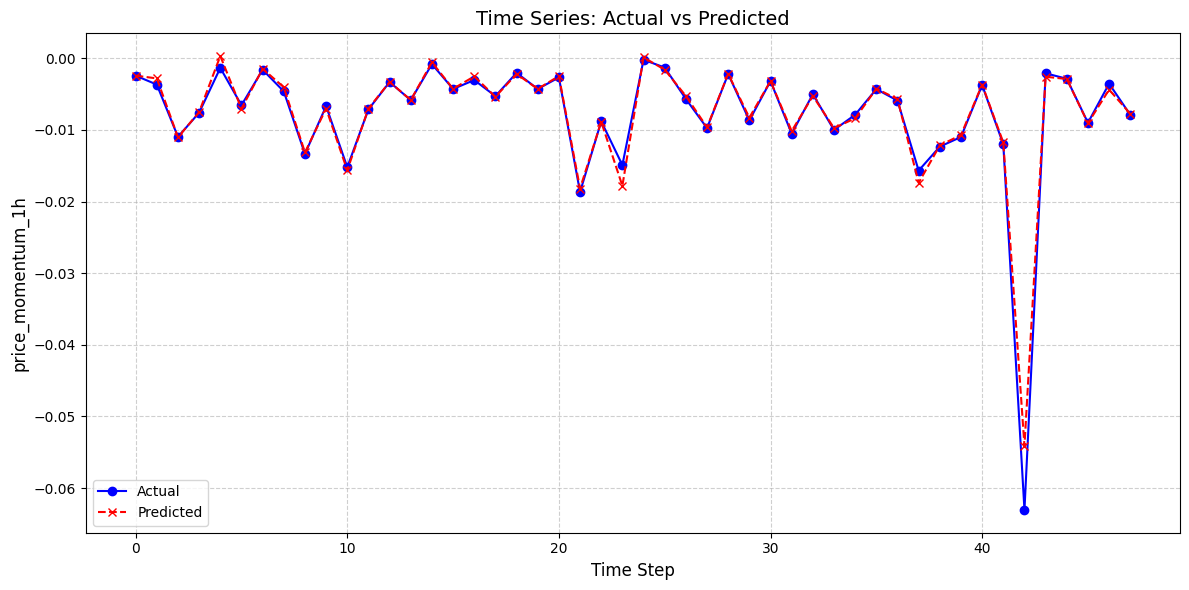

In [35]:
# # Plot actual vs predicted for first 20 samples
# plt.figure(figsize=(12, 6))
# plt.plot(Ytest[index][:100], label='Actual')
# plt.plot(Ypred_test[index][:100], label='Predicted')
# plt.title('Actual vs Predicted for 20 Samples')
# plt.xlabel('Sample Index')
# plt.ylabel(tv)
# plt.legend()
# plt.show()
import matplotlib.pyplot as plt

# Define number of time steps to visualize
time_steps = 48

# Optional: create x-axis based on time steps (0 to 99)
time = list(range(time_steps))

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Actual values
plt.plot(time, Ytest[index][:time_steps], label='Actual', color='blue', marker='o', linestyle='-')

# Plot Predicted values
plt.plot(time, Ypred_test[index][:time_steps], label='Predicted', color='red', marker='x', linestyle='--')

# Add title and labels
plt.title('Time Series: Actual vs Predicted', fontsize=14)
plt.xlabel('Time Step', fontsize=12)
plt.ylabel(tv, fontsize=12)  # Assuming 'tv' is the target variable name

# Add legend
plt.legend()

# Optional: Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
# Ypred_test[index]

In [ ]:
import pandas as pd

def save_predictions(index, Ytest, Ypred_test, filename_prefix="results"):
    # Extract the lists
    actuals = Ytest[index]
    preds = Ypred_test[index]

    # Convert to list if they are not already
    actuals_list = actuals
    preds_list = preds

    # Create a DataFrame
    df = pd.DataFrame({
        "Actual": actuals_list,
        "Predicted": preds_list
    })

    # Generate filename with index
    filename = f"{filename_prefix}_index_{index}.csv"

    # Save to CSV
    df.to_csv(filename, index=False)
    print(f"Saved predictions to {filename}")


In [ ]:
# Let's say you're in iteration 2
save_predictions(index, Ytest, Ypred_test,filename_prefix="results_Ytest")


Saved predictions to results_Ytest_index_1.csv


In [ ]:
# Let's say you're in iteration 2
save_predictions(index, Yval, Ypred_val,filename_prefix="results_Yval")


Saved predictions to results_Yval_index_1.csv


In [ ]:
xtr.to_csv('VRM_trainset.csv',index=False)

In [ ]:
xt.to_csv('VRM_testset.csv',index=False)

In [ ]:
len(xgbmodel)

11

In [ ]:
import joblib
joblib.dump(xgbmodel[index], model_saving)

['/content/drive/MyDrive/Sriya/Train/data/solona/solona_model.pkl']

In [ ]:
train_mape_each_row = abs((xt['Bl. Pant Effluent Estimates_Predicted'] - xt['Bl. Pant Effluent Estimates']) / xt['Bl. Pant Effluent Estimates']) * 100
train_mape_each_row.mean()

7.139450790848574

# SXI

In [ ]:
Ytest[index]

In [49]:
type(Ytest)

list

In [ ]:
# list(Ytest[8])

# xt = Xtest[5]
# xt['Methane (ppb)'] = list(Ytest[5])
# xt['Methane (ppb)_Predicted'] = Ypred[5]
# xt

In [ ]:
list(Ytest[index])

In [59]:
type(Ypred_test)

list

In [ ]:
# xt = Xtest[5]
# xt['Methane (ppb)'] = list(Ytest[5])
# xt['Methane (ppb)_Predicted'] = Ypred[5]
# xt

In [80]:
# Import the necessary functions and classes from Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Legend, LegendItem
import numpy as np

# Enable Bokeh output in Jupyter Notebook
output_notebook()

# # Dummy data for Ytest and Ypred (replace with actual values)
# Ytest = [50, 60, 70, 80, 90, 100]  # Actual values
# Ypred = [48, 63, 69, 75, 92, 102]  # Predicted values

# Calculate 10% error boundaries
Ytest_array = np.array(Ytest[index])
upper_bound = Ytest_array * 1.1
lower_bound = Ytest_array * 0.9

# Create a new plot
p = figure(title="Actual vs Predicted Solona in price_momentum_1h - SXI++", width=600, height=400)
p.title.align = 'center'

# Plot points within and outside the 10% error boundaries
within_bounds_x = []
within_bounds_y = []
outside_bounds_x = []
outside_bounds_y = []

for yt, yp in zip(Ytest[index], Ypred_test[index]):
    if yt * 0.9 <= yp <= yt * 1.1:
        within_bounds_x.append(yt)
        within_bounds_y.append(yp)
    else:
        outside_bounds_x.append(yt)
        outside_bounds_y.append(yp)

# Plot points
p.circle(within_bounds_x, within_bounds_y, size=8, color="green", alpha=0.6)
p.circle(outside_bounds_x, outside_bounds_y, size=8, color="red", alpha=0.6)

# Add a line for the perfect prediction (y = yp)
p.line([min(Ytest[index]), max(Ytest[index])], [min(Ytest[index]), max(Ytest[index])], color="black", line_width=2, legend_label='Perfect Prediction')

# Add dashed lines for ±10% error boundaries
p.line(Ytest[index], upper_bound, color="blue", line_width=1.5, line_dash="dashed", legend_label='+10% Error')
p.line(Ytest[index], lower_bound, color="blue", line_width=1.5, line_dash="dashed", legend_label='-10% Error')

# Set axis labels
p.xaxis.axis_label = 'Actual '+tv
p.yaxis.axis_label = 'Predicted  '+tv

# Add a custom legend item for MAE and R²
# legend_item = LegendItem(label='Error%=3.48, R² Score: 0.89', renderers=[], index=0)
# p.legend.items.append(legend_item)

# Set legend location
p.legend.location = 'top_left'

# Show the plot
show(p)


In [71]:
print(Ypred_test[index])

[-0.0024373673274606573, -0.002817301124299057, -0.011033074511078796, -0.007517053548568568, 0.00030388959092642173, -0.007036674116911652, -0.0014732978720271668, -0.004048738473306055, -0.013150251987019943, -0.007022043902502389, -0.01564742020352948, -0.007026859509306978, -0.003317351451277129, -0.005834257323061531, -0.0005711697679347552, -0.004268558637908564, -0.002535699818516671, -0.0053791023598981445, -0.002198681323456515, -0.004286688545357088, -0.002493017670811561, -0.018184092129466808, -0.008871089116570063, -0.017808790903878, 0.00011437621832612286, -0.0016032106969845574, -0.005273660044281062, -0.00963969436522582, -0.0021814121069419464, -0.008304490744225736, -0.0031821090370462296, -0.010168172710476611, -0.005267093536427448, -0.009747375344635935, -0.008390596927786452, -0.004249774792527243, -0.005705894724144605, -0.0173886625458787, -0.012168306583865007, -0.010719265128794654, -0.0036757765842778487, -0.011761830491725904, -0.05410648443876055, -0.00258

In [75]:
_temp = pd.DataFrame({tv+"_Prediction":Ypred_test[index]},)


In [77]:
_temp.describe()

,price_momentum_1h_Prediction
count,3601.000000
mean,-0.006802
std,0.006721
min,-0.054106
25%,-0.009103
50%,-0.004909
75%,-0.002205
max,0.003760


In [67]:
Ytest[index].describe()

,price_momentum_1h_state
count,3601.000000
mean,-0.006977
std,0.007376
min,-0.081158
25%,-0.009071
50%,-0.004879
75%,-0.002243
max,0.000173


# Trees starts

In [ ]:
df=pd.read_csv('fulldataplustrainmasterIOT.csv',low_memory=False)
# df=df.replace('pending',0)
# df=df.replace('complete',1)

df =df.iloc[:,1:]
# df = df.drop('Methane (ppb)', axis=1)
df

,Methane (ppb),Moisture,Temperature,Humidity,R2611E,R2600,R2602,R2611C,RMQ4,Methane (ppb)_state,composite_dxi_label,composite_dxi
0,1,17690.4870,28.915,46.45,77246.44884,12892.65565,23522.957900,26622.32222,57864.89524,2195.31155,1,12.263395
1,1,16875.2500,28.840,45.45,77548.17411,12979.50416,23538.955510,27052.15197,59139.86071,2195.10300,1,12.041804
2,1,16056.9315,28.740,44.50,78465.78140,13212.08022,23677.230340,27794.35311,60814.49119,2194.82275,1,11.840364
3,1,15322.0285,28.635,43.60,79713.33811,13463.32250,23935.415410,28585.73388,62568.06050,2194.53615,1,11.668186
4,1,14679.3625,28.515,42.80,80528.21863,13672.19197,24127.549700,29275.33616,64175.47182,2194.29040,1,11.515000
...,...,...,...,...,...,...,...,...,...,...,...,...
28367,1,23418.8320,29.300,56.45,59730.13700,10752.49403,8631.104832,21404.86214,52705.06707,2101.62820,0,18.184212
28368,1,23436.2770,29.355,56.20,59511.89601,10734.47929,8614.394989,21379.95195,52748.57886,2101.45800,0,18.197695
28369,1,23288.4200,29.450,55.60,59595.96967,10765.08817,8602.632831,21432.15244,52891.97719,2101.30895,0,18.157064
28370,1,22987.5740,29.520,54.75,59714.77438,10822.12541,8610.289298,21561.45014,53440.35685,2101.22205,0,18.058154


In [ ]:
x=df.drop(['composite_dxi_label','composite_dxi',tv,'gd_bdDXI','Instances',target,'index'],axis=1, errors='ignore')
y = df[tv]
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.6,max_iter=10000).fit(x, y)

In [ ]:
# # x=df.drop(['composite_dxi_label','composite_dxi',tv],axis=1)
# x=df.drop(['composite_dxi_label','composite_dxi',tv,'Concrete compressive strength(MPa) '],axis=1)
# y = df[tv]
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0).fit(x, y)

In [ ]:
a = clf.coef_[0]
h = x.columns

In [ ]:
a

0.17211814590024277

In [ ]:
o = {'Features':h,
    'Coefficient':a
    }
ty = pd.DataFrame(o)
typv = ty.loc[(ty['Coefficient'] >=0)]
# zrcor = ty.loc[(ty['Coefficient'] = 0) & (ty['Coefficient'] < 1)]
# zrft = list(zrcor['Features'])
pvft = list(typv['Features'])
pvft

['Moisture',
 'Temperature',
 'Humidity',
 'R2611E',
 'R2600',
 'R2602',
 'R2611C',
 'RMQ4']

In [ ]:
tyng = ty.loc[(ty['Coefficient'] < 0)]
ngft = list(tyng['Features'])
ngft

[]

In [ ]:
newx = x[ngft]
for i in newx.columns:
    newx[i] = newx[i].map(lambda a:1*a) #Negative correlated features

In [ ]:
newx1 = x[pvft]
for i in newx1.columns:
    newx1[i] = newx1[i].map(lambda a: 1*a)#Positvely correlated features

In [ ]:
finalnewx = pd.concat([newx,newx1],axis=1)
finalnewx

,Moisture,Temperature,Humidity,R2611E,R2600,R2602,R2611C,RMQ4
0,17690.4870,28.915,46.45,77246.44884,12892.65565,23522.957900,26622.32222,57864.89524
1,16875.2500,28.840,45.45,77548.17411,12979.50416,23538.955510,27052.15197,59139.86071
2,16056.9315,28.740,44.50,78465.78140,13212.08022,23677.230340,27794.35311,60814.49119
3,15322.0285,28.635,43.60,79713.33811,13463.32250,23935.415410,28585.73388,62568.06050
4,14679.3625,28.515,42.80,80528.21863,13672.19197,24127.549700,29275.33616,64175.47182
...,...,...,...,...,...,...,...,...
28367,23418.8320,29.300,56.45,59730.13700,10752.49403,8631.104832,21404.86214,52705.06707
28368,23436.2770,29.355,56.20,59511.89601,10734.47929,8614.394989,21379.95195,52748.57886
28369,23288.4200,29.450,55.60,59595.96967,10765.08817,8602.632831,21432.15244,52891.97719
28370,22987.5740,29.520,54.75,59714.77438,10822.12541,8610.289298,21561.45014,53440.35685


In [ ]:
# y1 = y *0.4363
# y1

In [ ]:
# y

# SXI Tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(max_depth=3,criterion='absolute_error',min_impurity_decrease =0.5,warm_start=True,)
rf2.fit(x, y)


KeyboardInterrupt: 

In [ ]:
# import xgboost as xg
# import dtreeviz
# xgb = xg.XGBRegressor(max_depth=3).fit(x,y)

In [ ]:
 import os

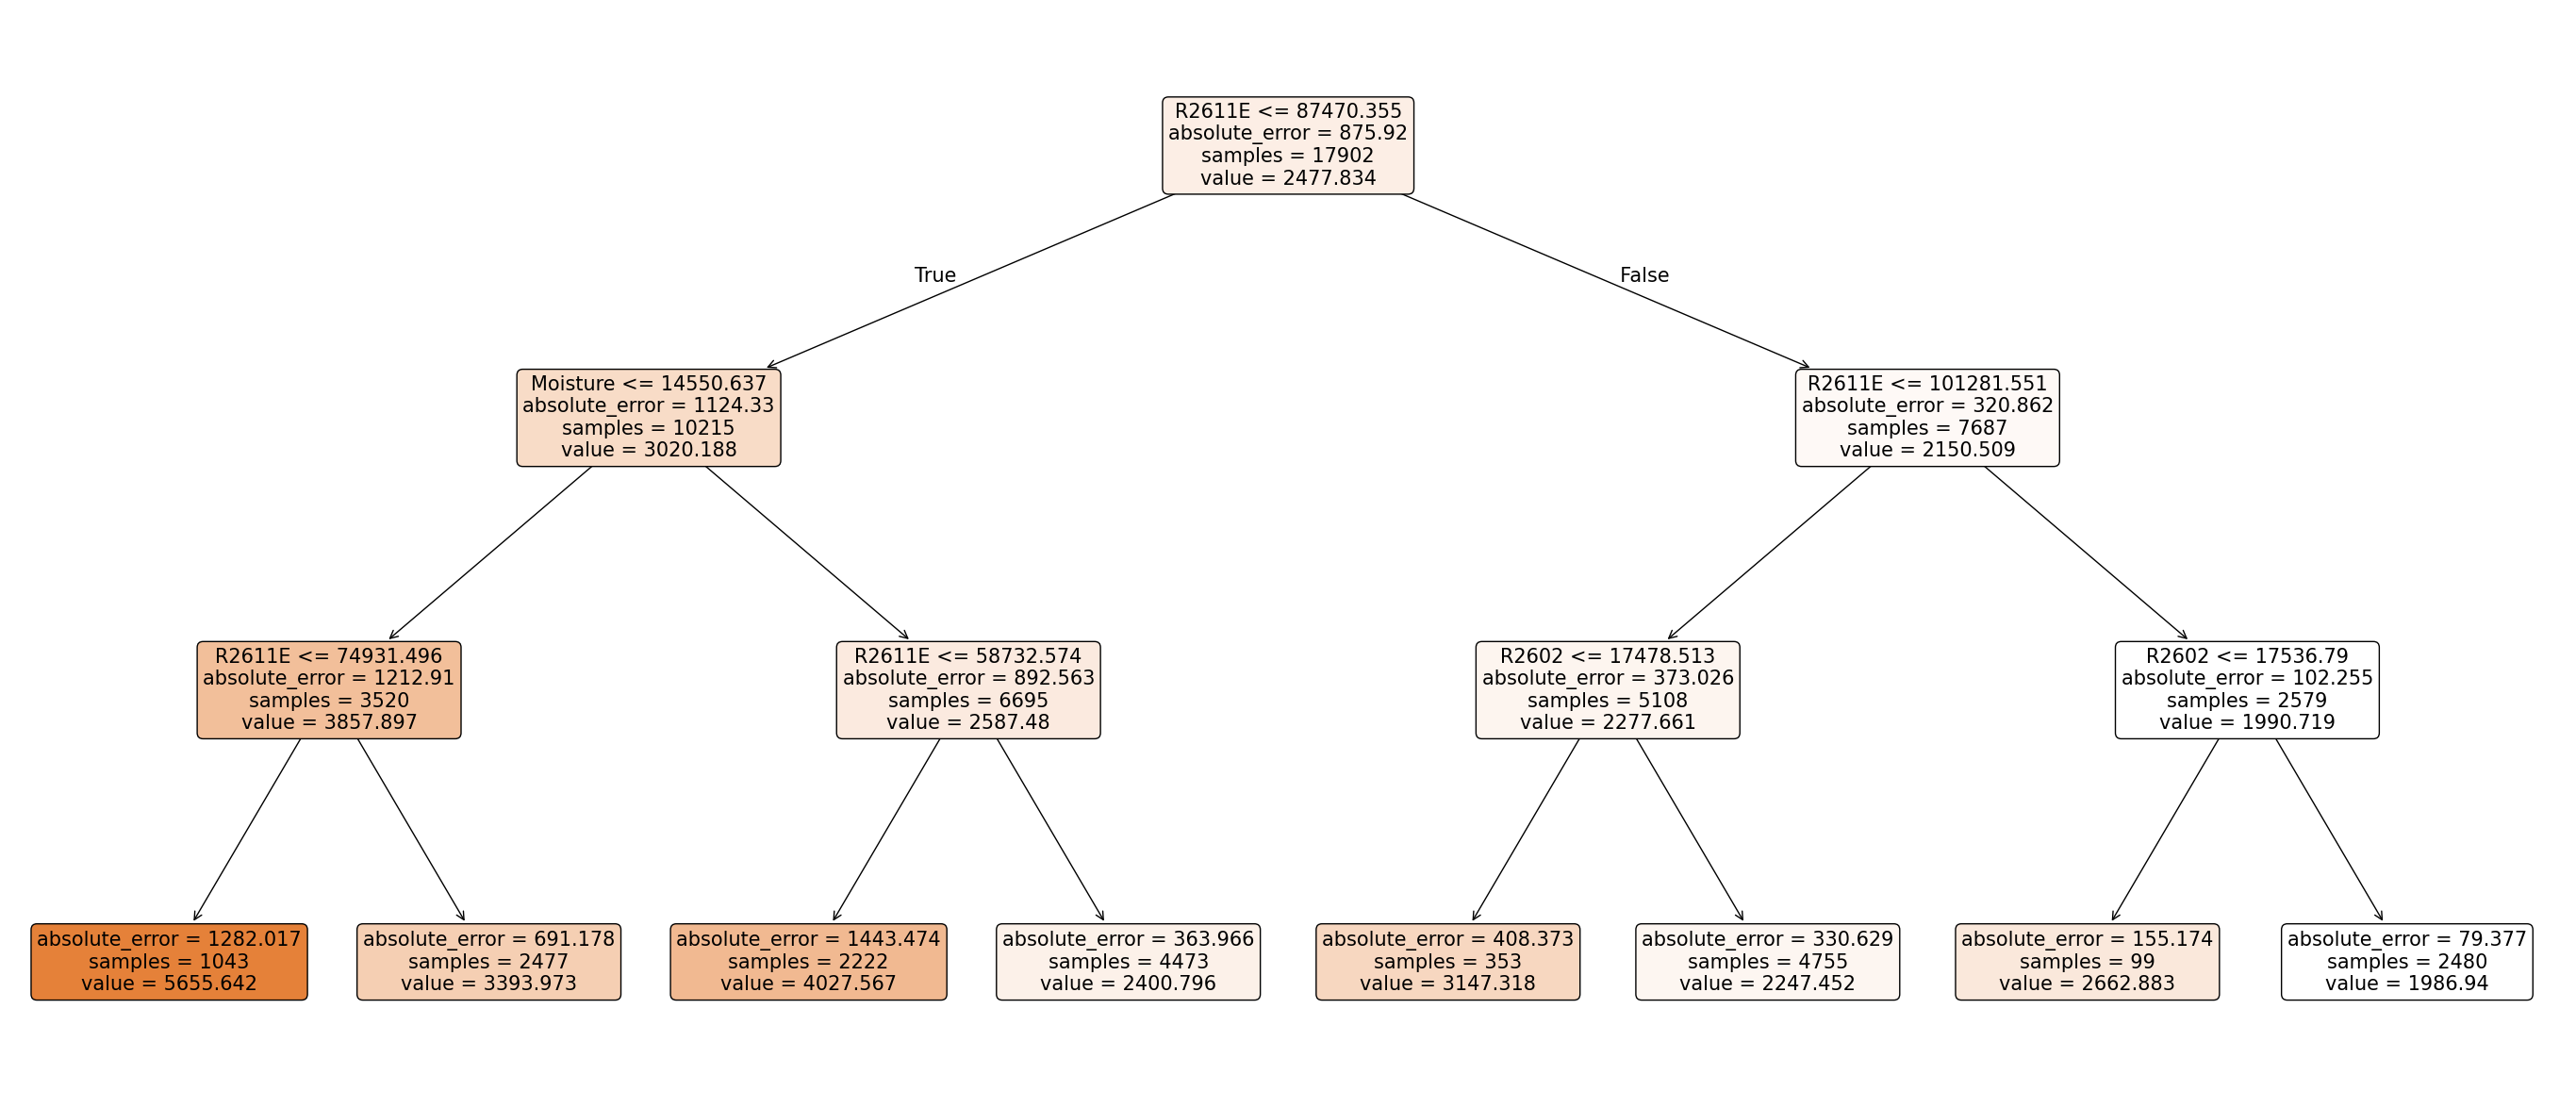

In [ ]:
i=10
from sklearn.tree import plot_tree
plt.figure(figsize=(35,15))
plot_tree(rf2.estimators_[i], filled=True,rounded=True, feature_names=x.columns,fontsize=15)
# plt.savefig(f"tree_class_curr{i}.png")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

for i in range(0, 99):
    plt.figure(figsize=(35, 15), dpi=300)
    plt.title(f"Decision Tree {i+1}", fontsize=50)  # Add title at the top
    plot_tree(rf2.estimators_[i], filled=True, rounded=True, feature_names=x.columns, fontsize=15)
    plt.savefig(f'E:\dt\DOTCURR{i}.png')
    # plt.show()  # Close the figure to free memory
    plt.close()


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Prabhat\AppData\Local\Temp\ipykernel_12760\1452820483.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.savefig(f'E:\dt\DOTCURR{i}.png')


In [ ]:
# f = plot_tree(rf2.estimators_[12], filled=True,rounded=True, feature_names=x.columns, fontsize=15)
# f

In [ ]:
# f[0].get_position()

In [ ]:
# Get the feature importances for the selected tree
tree = rf2.estimators_[2]
tree_feature_importances = tree.feature_importances_
importance_df = pd.DataFrame({
    'Feature':  x.columns[:],
    'Importance': tree_feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

IndexError: list index out of range

In [ ]:
len(tree_feature_importances)

5

In [ ]:
f[0].get_text()

'Kappa  <= 32.5\nsquared_error = 1523.581\nsamples = 39\nvalue = 123.05'

In [ ]:
# decision_tree_nodes = []
# for i in range(len(f)):
#     decision_tree_nodes.append(f[i].get_text())
# decision_tree_nodes

In [ ]:
# decision_tree_nodes = []
# for i in range(len(f)):
#     decision_tree_nodes.append(f[i].get_text())
# featureset = []
# for node in decision_tree_nodes:
#     for feature in x.columns:
#         if f'{feature} <=' in node:
#             featureset.append(feature)
# featureset = list(set(featureset))
# featureset

# Target SXI tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(max_depth=3,n_estimators =100,criterion='absolute_error',min_impurity_decrease =5)
# finalnewx.drop('YRDATA',axis=1,inplace=True)
rf1.fit(finalnewx, y)

KeyboardInterrupt: 

In [ ]:
# from xgboost import plot_tree

In [ ]:
# xgbtg = xg.XGBRegressor(max_depth =3).fit(finalnewx,y)

In [ ]:
# viz_modeltg = dtreeviz.model(xgbtg, tree_index=1,
#                           X_train=finalnewx, y_train=y,
#                            feature_names=list(finalnewx.columns),
#                            target_name=tv, class_names=["Slow Response", "Quick Response"])

In [ ]:
# viz_modeltg.view()

In [ ]:
# viz_modeltg.view().save("targettreeecomb.svg")
# import cairosvg
# cairosvg.svg2png(url="targettreeecomb.svg", write_to="targettreeecomb.png",output_width=1900,output_height=1000,dpi=300)

2278451.41

2278451.41

1069775.1603992572


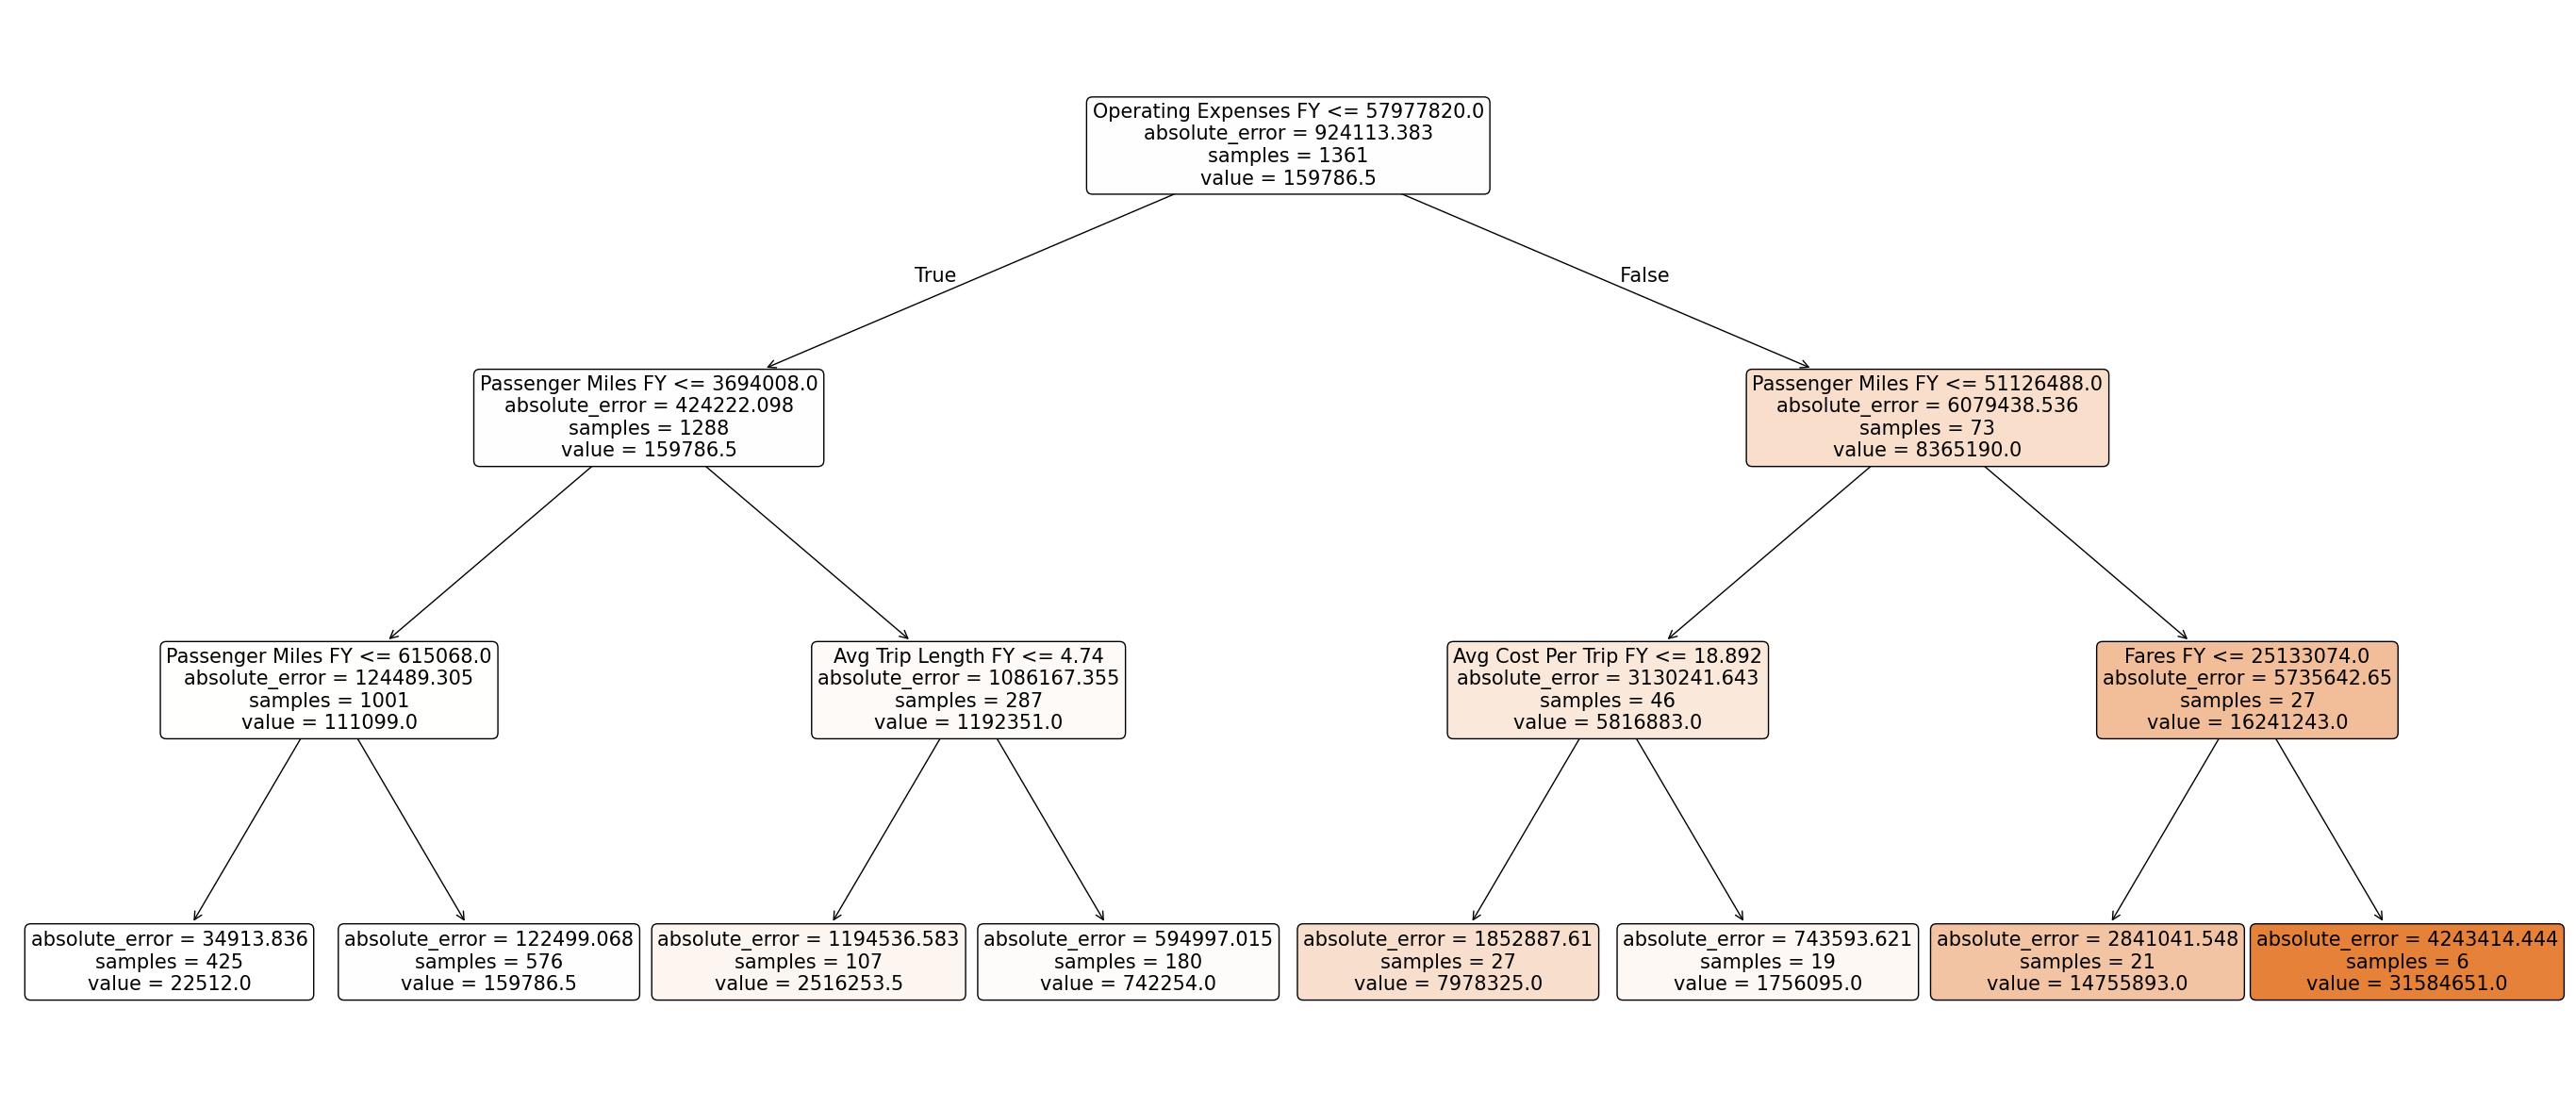

In [ ]:
i=15
print(df[tv].mean())
from sklearn.tree import plot_tree
plt.figure(figsize=(35,15))
plot_tree(rf1.estimators_[i], filled=True,rounded=True, feature_names=x.columns,fontsize=15)
# plt.savefig(f"tree_class_curr{i}.png")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# for i in range(99):  # No need for (0, 99), as range(99) is equivalent
#     plt.figure(figsize=(35, 15), dpi=300)
#     plt.title(f"Decision Tree {i+1}", fontsize=20)
#     plot_tree(rf1.estimators_[i], filled=True, rounded=True, feature_names=finalnewx.columns, fontsize=15, precision=2)

#     # plt.savefig(rf"D:\DeskTop\SRIYA WORK\SXI Code\Paper Dataset\treetarget\paper_tree{i}.png")

#     # plt.show()  # Display the plot
#     plt.close()  # Close the figure to free memory


In [ ]:
tree = rf1.estimators_[13]
tree_feature_importances = tree.feature_importances_
importance_df = pd.DataFrame({
    'Feature': finalnewx.columns,
    'Importance': tree_feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

                        Feature  Importance
9         Operating Expenses FY    0.580630
15  Mode/Type of Service Status    0.350663
6            Passenger Miles FY    0.050152
7            Avg Trip Length FY    0.014145
4         Service Area SQ Miles    0.004409
0                       UACE CD    0.000000
11        Avg Fares Per Trip FY    0.000000
14               3 Mode Encoded    0.000000
13                         Mode    0.000000
12                     HQ State    0.000000
8                      Fares FY    0.000000
10         Avg Cost Per Trip FY    0.000000
1                  UZA SQ Miles    0.000000
5      Last Closed FY End Month    0.000000
3       Service Area Population    0.000000
2                UZA Population    0.000000
16                Reporter Type    0.000000


In [ ]:
F = plot_tree(rf1.estimators_[13], filled=True, rounded=True, feature_names=finalnewx.columns, fontsize=15, precision=2)
F

# HERE WE GO AGAIN

In [ ]:
target_col = tv

drop_cols = ['index', 'isFraud', 'Datasetname', 'TransactionID',
             'composite_dxi_label', 'Unnamed: 0',target,'Unlinked Passenger Trips FY']

X = df.drop(columns=drop_cols, errors='ignore')
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print(f'Train len: {len(X_train)}')
print(f'Test len: {len(X_test)}')

model = xgb.XGBRegressor(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



Train len: 1788
Test len: 447


<IPython.core.display.Javascript object>

SXI r2 SCORE:  0.9330589681779121
SXI Mean Absolute Error:  177766.3158880656


SXI r2 SCORE:  0.9330589681779121
SXI Mean Absolute Error:  177766.3158880656

In [ ]:
acc = r2_score(y_test,y_pred)
print('SXI r2 SCORE: ',round(acc,3))
preci = mean_absolute_error(y_test,y_pred)
print('SXI Mean Absolute Error: ',round(preci,3))


SXI r2 SCORE:  0.933
SXI Mean Absolute Error:  177766.316


In [ ]:
with open('fulldataplusVRMmodel.pkl', 'wb') as f:
    pickle.dump(model, f)

test_preds_df = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred': y_pred
})
test_preds_df.to_csv('VRM_predtst.csv', index=False)

y_train_pred = model.predict(X_train)
train_preds_df = pd.DataFrame({
    'y_train': y_train.values,
    'y_train_pred': y_train_pred
})
train_preds_df.to_csv('VRM_predtrain.csv', index=False)

<IPython.core.display.Javascript object>